<a href="https://colab.research.google.com/github/Lary2801/Projeto-K-Means/blob/main/Projeto_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-e469c632bd4b>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


Primeiras linhas do dataset:
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0.123320   

        555       556       557       5

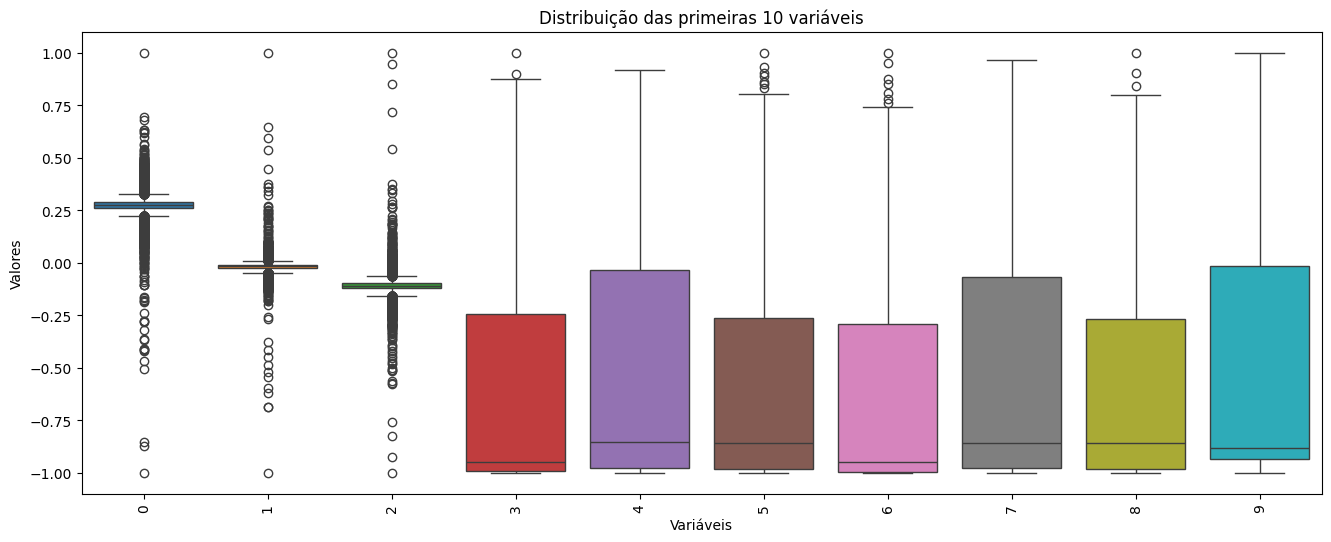

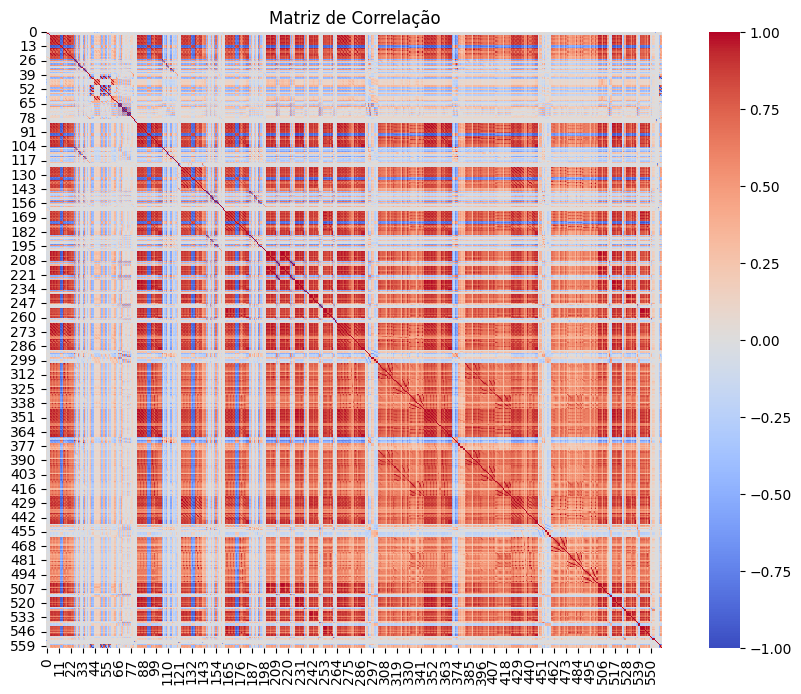


Variáveis com alta correlação (threshold > 0.9):
438    167
95     157
226    156
359    156
231    156
      ... 
341      2
217      2
224      2
225      2
323      2
Length: 431, dtype: int64

Variância explicada pelos dois primeiros componentes principais:
[0.50781172 0.0658068 ]


<ipython-input-1-e469c632bd4b>:62: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.6, cmap='viridis')


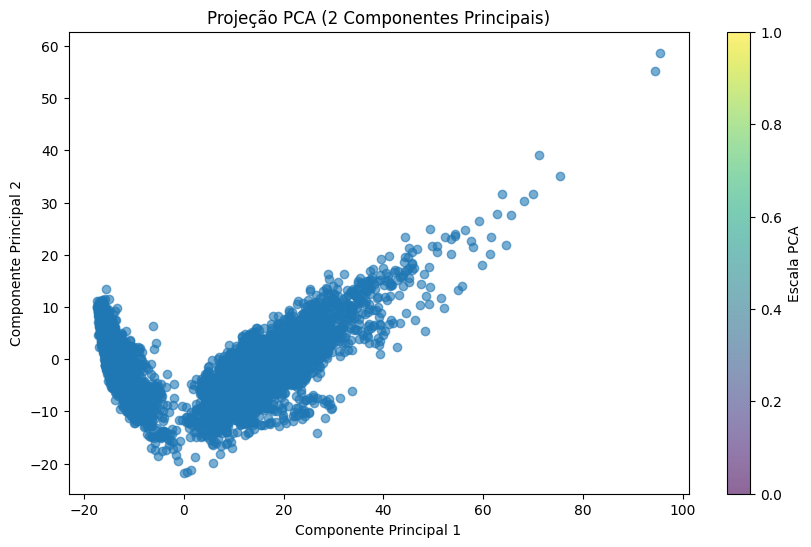

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Carregar o dataset
file_path = "X_train.txt"
data = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Mostrar as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(data.head())

# Verificar dimensões do dataset
print("\nDimensões do dataset:")
print(data.shape)

# Análise exploratória: Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(data.describe())

# Análise das distribuições das variáveis
plt.figure(figsize=(16, 6))
sns.boxplot(data=data.iloc[:, :10])  # Exibir apenas as 10 primeiras variáveis para visualização
plt.title("Distribuição das primeiras 10 variáveis")
plt.xlabel("Variáveis")
plt.ylabel("Valores")
plt.xticks(rotation=90)
plt.show()

# Análise de correlação entre as variáveis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmax=1.0, vmin=-1.0, square=True)
plt.title("Matriz de Correlação")
plt.show()

# Seleção de variáveis mais correlacionadas (se necessário)
threshold = 0.9  # Ajuste o limite de correlação
high_corr_vars = (correlation_matrix.abs() > threshold).sum().sort_values(ascending=False)
print("\nVariáveis com alta correlação (threshold > 0.9):")
print(high_corr_vars[high_corr_vars > 1])  # Ignora autovariância

# Redução de dimensionalidade com PCA
# Normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# PCA para redução para 2 componentes principais
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Visualizar variância explicada
print("\nVariância explicada pelos dois primeiros componentes principais:")
print(pca.explained_variance_ratio_)

# Visualização dos dados reduzidos
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.6, cmap='viridis')
plt.title("Projeção PCA (2 Componentes Principais)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Escala PCA")
plt.show()



Variância explicada pelos 10 componentes principais:
[0.50781172 0.0658068  0.02806437 0.02503953 0.01888285 0.01724006
 0.01371011 0.01199078 0.0099586  0.00965087]

Plotando o método do cotovelo para determinar o número ideal de clusters:


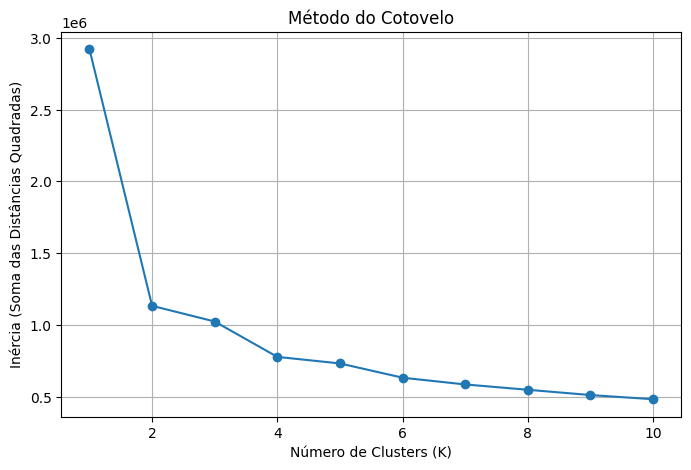


Plotando o Silhouette Score para determinar o número ideal de clusters:


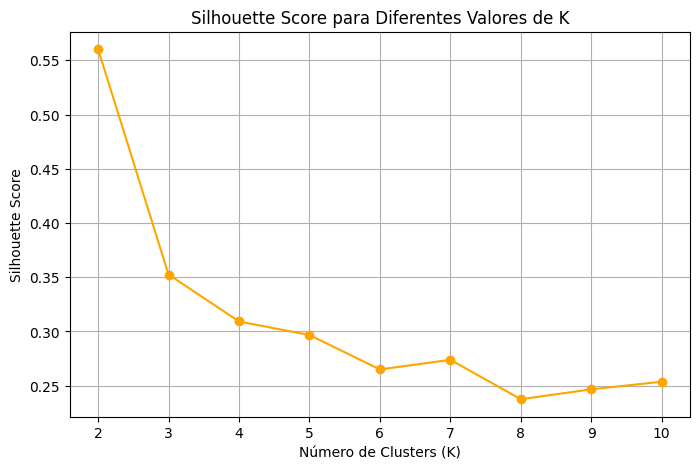

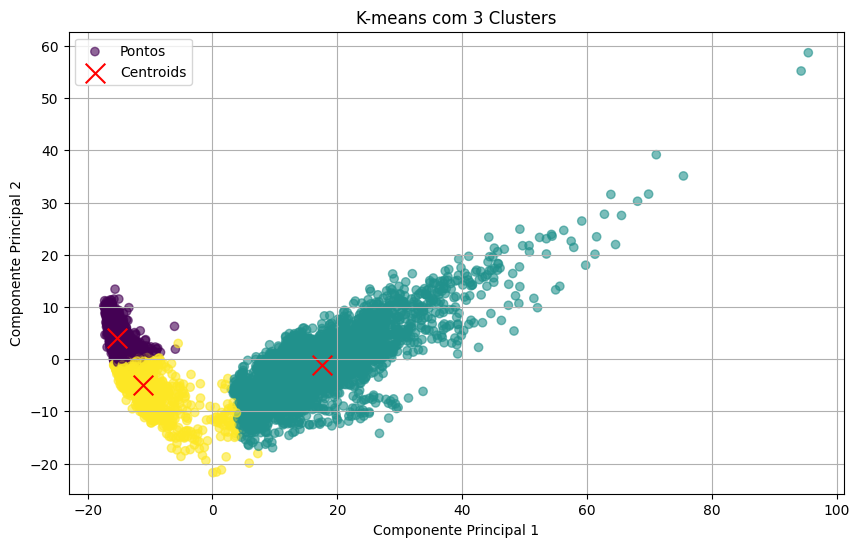

In [ ]:
# Importar bibliotecas necessárias
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Aplicar PCA novamente
# Certifique-se de usar os dados normalizados
pca = PCA(n_components=10)  # Mantendo 10 componentes principais
data_pca = pca.fit_transform(data_normalized)

print("\nVariância explicada pelos 10 componentes principais:")
print(pca.explained_variance_ratio_)

# Função para calcular a soma das distâncias quadradas (Elbow Method)
def plot_elbow_method(data, max_k=10):
    inertia = []
    k_range = range(1, max_k + 1)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, marker='o')
    plt.title("Método do Cotovelo")
    plt.xlabel("Número de Clusters (K)")
    plt.ylabel("Inércia (Soma das Distâncias Quadradas)")
    plt.grid(True)
    plt.show()

# Visualizar o Elbow Method
print("\nPlotando o método do cotovelo para determinar o número ideal de clusters:")
plot_elbow_method(data_pca, max_k=10)

# Função para calcular o silhouette score para diferentes valores de K
def plot_silhouette_scores(data, max_k=10):
    silhouette_scores = []
    k_range = range(2, max_k + 1)  # Começa em 2, já que silhouette não é definido para k=1
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, silhouette_scores, marker='o', color='orange')
    plt.title("Silhouette Score para Diferentes Valores de K")
    plt.xlabel("Número de Clusters (K)")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.show()

# Visualizar o Silhouette Score
print("\nPlotando o Silhouette Score para determinar o número ideal de clusters:")
plot_silhouette_scores(data_pca, max_k=10)

# Treinar o modelo de K-means com o número ideal de clusters
# Escolha o valor de K baseado nos gráficos anteriores (substitua K=3 pelo valor ideal)
k_optimal = 3  # Ajuste conforme os resultados do Elbow Method e Silhouette Score
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
kmeans.fit(data_pca)

# Obter os rótulos dos clusters e centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizar os clusters em 2D usando os dois primeiros componentes principais
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, label="Pontos")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label="Centroids")
plt.title(f"K-means com {k_optimal} Clusters")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()



Dados normalizados com sucesso.

Variância explicada pelos 10 componentes principais:
[0.50781172 0.0658068  0.02806437 0.02503953 0.01888285 0.01724006
 0.01371011 0.01199078 0.0099586  0.00965087]

Executando K-means com K=3 por 5 vezes para verificar estabilidade...

Silhouette Scores para cada execução:
[0.48424621323640266, 0.48424621323640266, 0.48424621323640266, 0.48424621323640266, 0.48426544407627736]
Média dos Silhouette Scores: 0.4843
Desvio Padrão dos Silhouette Scores: 0.0000

Consistência entre as execuções: 82.03%


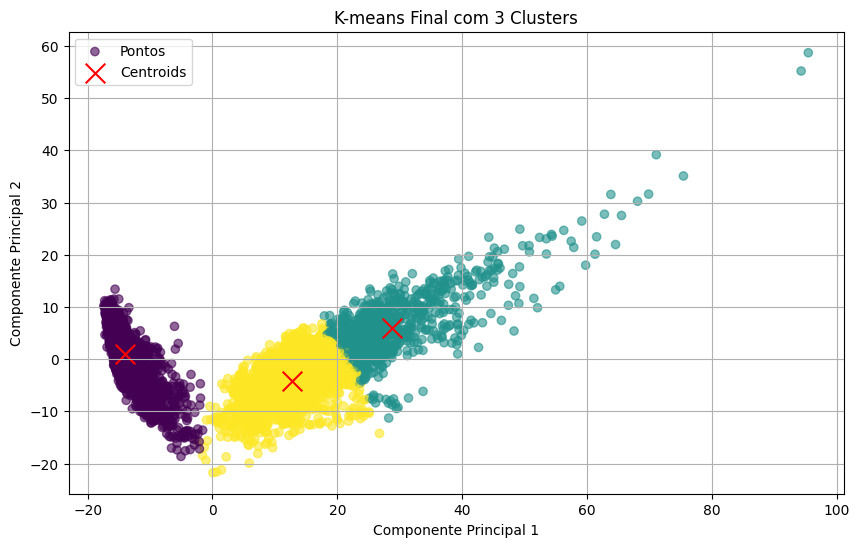

In [ ]:
# Importar bibliotecas necessárias
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Normalização dos dados
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)  # Normalizar os dados originais
print("\nDados normalizados com sucesso.")

# Aplicação de PCA novamente (para dados normalizados)
pca = PCA(n_components=10)  # Mantendo 10 componentes principais
data_pca = pca.fit_transform(data_normalized)

print("\nVariância explicada pelos 10 componentes principais:")
print(pca.explained_variance_ratio_)

# Repetição do treinamento para verificar estabilidade
n_runs = 5  # Número de execuções para verificar estabilidade
k_optimal = 3  # Substitua com o valor ideal baseado nas etapas anteriores
cluster_labels_runs = []  # Guardar os rótulos gerados em cada execução
silhouette_scores = []  # Guardar os silhouette scores

print(f"\nExecutando K-means com K={k_optimal} por {n_runs} vezes para verificar estabilidade...")

for run in range(n_runs):
    kmeans = KMeans(
        n_clusters=k_optimal,
        init="k-means++",
        n_init=10,  # Número de inicializações independentes do K-means
        max_iter=300,  # Número máximo de iterações
        random_state=42 + run  # Diferente estado inicial para cada execução
    )
    kmeans.fit(data_pca)
    cluster_labels_runs.append(kmeans.labels_)
    silhouette_scores.append(silhouette_score(data_pca, kmeans.labels_))

# Exibir a média e desvio padrão dos silhouette scores
print("\nSilhouette Scores para cada execução:")
print(silhouette_scores)
print(f"Média dos Silhouette Scores: {np.mean(silhouette_scores):.4f}")
print(f"Desvio Padrão dos Silhouette Scores: {np.std(silhouette_scores):.4f}")

# Verificação de consistência entre os clusters formados
consistency_matrix = np.array(cluster_labels_runs)
consistency_check = np.mean(consistency_matrix == consistency_matrix[0, :], axis=0)  # Comparar com a primeira execução
consistency_score = np.mean(consistency_check)  # Percentual médio de consistência

print(f"\nConsistência entre as execuções: {consistency_score:.2%}")

# Visualização dos clusters com os centroides
kmeans_final = KMeans(
    n_clusters=k_optimal,
    init="k-means++",
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans_final.fit(data_pca)

labels_final = kmeans_final.labels_
centroids_final = kmeans_final.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_final, cmap='viridis', alpha=0.6, label="Pontos")
plt.scatter(centroids_final[:, 0], centroids_final[:, 1], c='red', s=200, marker='x', label="Centroids")
plt.title(f"K-means Final com {k_optimal} Clusters")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()



Métricas de Avaliação do Modelo Final:
Inércia (Soma das Distâncias Quadradas): 881007.9475
Silhouette Score Médio: 0.4842

Estatísticas descritivas por cluster:
              PCA1      PCA2
Cluster                     
0       -14.019258  1.064076
1        28.715356  6.036277
2        12.696205 -4.153320


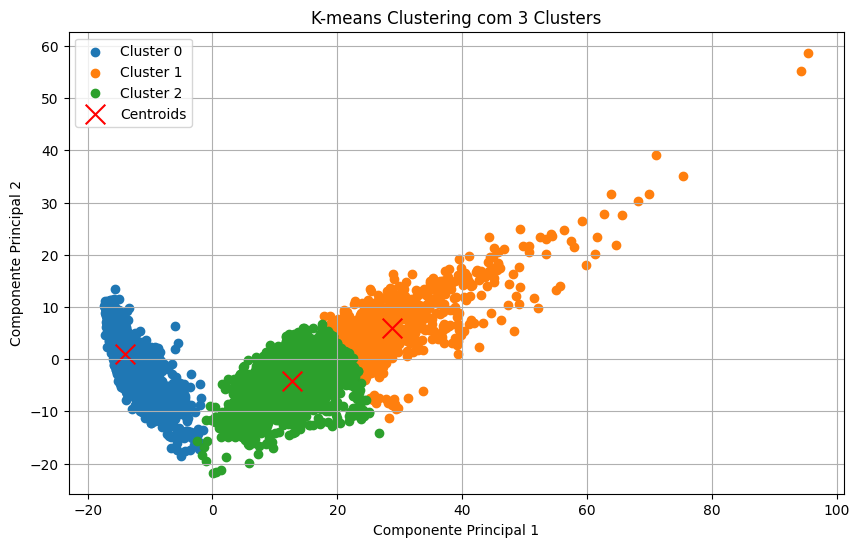

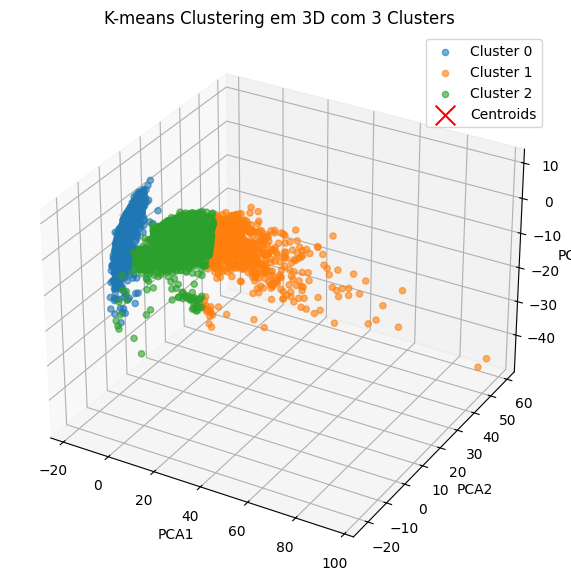

In [ ]:
# Importar bibliotecas necessárias
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Métricas de Avaliação
# Inércia já está disponível no modelo treinado
inertia = kmeans_final.inertia_
silhouette_avg = silhouette_score(data_pca, labels_final)

print("\nMétricas de Avaliação do Modelo Final:")
print(f"Inércia (Soma das Distâncias Quadradas): {inertia:.4f}")
print(f"Silhouette Score Médio: {silhouette_avg:.4f}")

# Análise das Características dos Clusters
# Criar um DataFrame para análise (usando os dois primeiros componentes do PCA)
cluster_df = pd.DataFrame(data_pca[:, :2], columns=["PCA1", "PCA2"])
cluster_df['Cluster'] = labels_final

# Estatísticas descritivas por cluster
print("\nEstatísticas descritivas por cluster:")
cluster_stats = cluster_df.groupby('Cluster').mean()
print(cluster_stats)

# Visualizações:
# 1. Gráfico 2D com os clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(k_optimal):
    cluster_data = cluster_df[cluster_df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f"Cluster {cluster_id}")
plt.scatter(centroids_final[:, 0], centroids_final[:, 1], c='red', s=200, marker='x', label="Centroids")
plt.title(f"K-means Clustering com {k_optimal} Clusters")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()

# 2. Visualização 3D (se necessário)
from mpl_toolkits.mplot3d import Axes3D

# Usar os três primeiros componentes principais
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for cluster_id in range(k_optimal):
    cluster_data = data_pca[labels_final == cluster_id]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f"Cluster {cluster_id}", alpha=0.6)
ax.scatter(centroids_final[:, 0], centroids_final[:, 1], centroids_final[:, 2], c='red', s=200, marker='x', label="Centroids")
ax.set_title(f"K-means Clustering em 3D com {k_optimal} Clusters")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.legend()
plt.show()
